In [1]:
import numpy as np
import sys
import json
import time
import datetime
import matplotlib.pyplot as plt

#NN Surrogate model class
from injector_surrogate_quads import *

from sampling_functions import get_ground_truth, get_beamsize
sys.path.append('../configs')

#Sim reference point to optimize around
from ref_config import ref_point

from emittance_calc import *

### Note: Output of emittance_calc is now:

normalized x-emittance , normalized y-emittance, Bmag-x, Bmag-y

# Load model 

In [2]:
Model = Surrogate_NN()
Model.load_saved_model(model_path = '../models/', \
                       model_name = 'model_OTR2_NA_rms_emit_elu_2021-07-27T19_54_57-07_00')
Model.load_scaling()
Model.take_log_out = False
energy = 0.135

#Sim reference point to optimize around
from ref_config import ref_point
ref_point_import = ref_point
#convert to machine units
ref_point1 = Model.sim_to_machine(np.asarray(ref_point))

# Set up initial data 

## Initial range for quad scan 
Using the same range for x and y

In [3]:
init_range =  [-4.5, -4, -3] 

Get beamsizes in x and y-dir at initial scan values

In [4]:
x_sizes = np.array([get_sizes(x)[0] for x in init_range])
y_sizes = np.array([get_sizes(x)[1] for x in init_range])

# Without adapting ranges

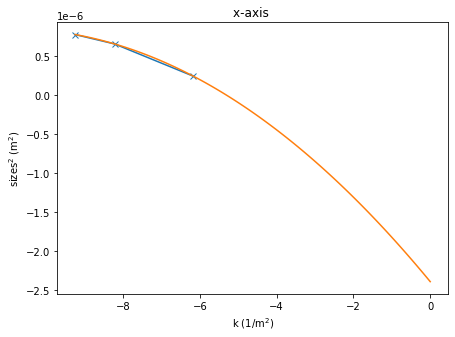

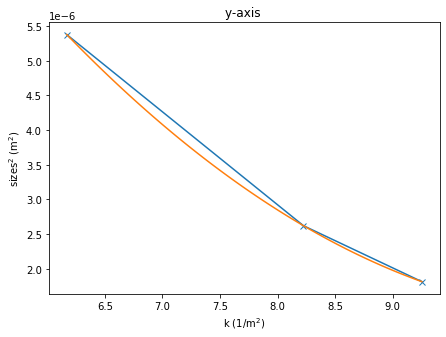

(nan, nan, nan, nan)

In [8]:
get_normemit(energy, init_range, init_range, x_sizes, y_sizes, show_plots=True)
# cannot find emittance with this bad range (see output below plot)

# To adapt ranges:

## Option 1: 
### Run get_normemit with adapt_ranges=True (automatically does it and calculates emittance)

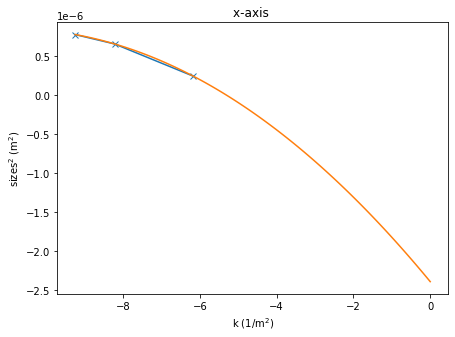

x axis: min. of poly fit is negative. Setting it to 0.
Adjusting concave poly.


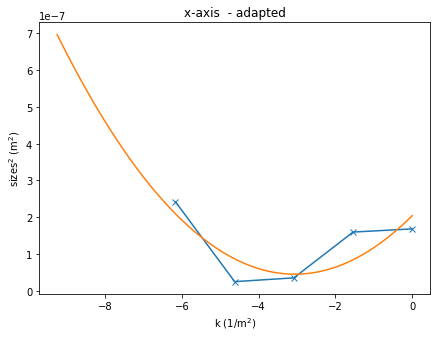

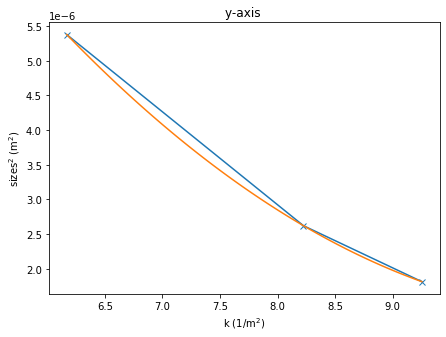

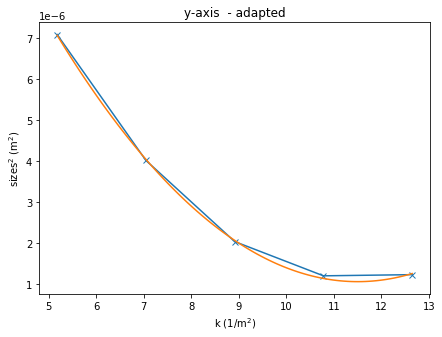

nemitx: 13.31, nemity: 190.83
bmagx: 4.83, bmagy: 2.79


(1.3313145656051691e-05,
 0.00019082876059171763,
 4.8288278226793135,
 2.789864222876158)

In [9]:
get_normemit(energy, init_range, init_range, x_sizes, y_sizes, adapt_ranges=True, num_points=5, show_plots=True)

## Option 2: Get adapted ranges first and decide which points to use

### 1. Adapt initial range for each axis 

In [5]:
new_x_range = adapt_range(init_range, x_sizes, axis='x')
new_y_range = adapt_range(init_range, y_sizes, axis='y')
print(new_x_range, new_y_range) #in kGauss

x axis: min. of poly fit is negative. Setting it to 0.
Adjusting concave poly.
[-3.   -2.25 -1.5  -0.75  0.  ] [-2.51962215 -3.42774257 -4.33586299 -5.24398341 -6.15210383]


### 2. Get the corresponding beamsizes for the points you decide to measure

In [6]:
new_x_sizes = np.array([get_sizes(x)[0] for x in new_x_range])
new_y_sizes = np.array([get_sizes(x)[1] for x in new_y_range])

### 3. Now pass these to the norm_emit function 

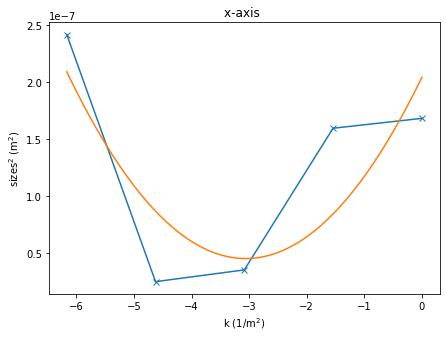

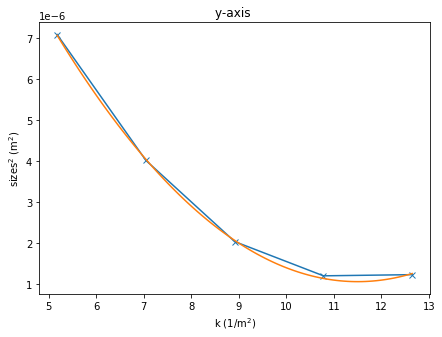

nemitx: 13.31, nemity: 190.83
bmagx: 4.83, bmagy: 2.79


(1.3313145656051676e-05,
 0.00019082876059171703,
 4.8288278226793135,
 2.7898642228761696)

In [7]:
get_normemit(energy, np.array(new_x_range), np.array(new_y_range), new_x_sizes, new_y_sizes,\
             adapt_ranges=False, show_plots=True)